<a href="https://colab.research.google.com/github/Aahra/Sale_price_Predictor_Milestone_project_2/blob/main/End_to_end_Sale_Price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Predicting the Sale price  of Bulldozers using Machine  learning

In this notebook we are going thru an ex of  Machine learning project with a goal to predicting  the sale price  of Bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the Kaggle Bluebook for Bulldozers competition.

The techniques used in here have been inspired and adapted from the fast.ai machine learning course.

What we'll end up with Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

6 Step Machine Learning Modelling Framework (read more) To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

Tools which can be used for each step of the machine learning modelling process. We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

## 1. Problem definition

How  well can we predict  the future sale price of a bulldozer ,given its characteristics and previous ex of much similar bulldozers have  been sold for.

## 2. Data
Data is downloaded froM Kaggle - 
 
 https://www.kaggle.com/c/bluebook-for-bulldozers/data

 The data for this competition is split into three parts:

    Train.csv is the training set, which contains data through the end of 2011.
    Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
    Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3.Evaluation
The evaluation metric for this competition is the RMSLE(root mean square log error) between the actual and predicted auction prices.

The goal for most regression evaluation metrics is to minimize  the error.
To build a machine learning  model which minimises RMSLE.

## 4. Features

Kaggle  provides the dat dictionary detailing on the  features of the dataset.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [18]:
# Import training and validation sets

# For importing  and reading  the files ,you can  either  read from the raw version on github or upload  it  (every time) on google  colab  and  copy the  path

df = pd.read_csv("/TrainAndValid.csv", low_memory= False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65347 entries, 0 to 65346
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   65347 non-null  int64  
 1   SalePrice                 65347 non-null  int64  
 2   MachineID                 65347 non-null  int64  
 3   ModelID                   65347 non-null  int64  
 4   datasource                65347 non-null  int64  
 5   auctioneerID              65347 non-null  int64  
 6   YearMade                  65347 non-null  int64  
 7   MachineHoursCurrentMeter  25601 non-null  float64
 8   UsageBand                 22675 non-null  object 
 9   saledate                  65347 non-null  object 
 10  fiModelDesc               65347 non-null  object 
 11  fiBaseModel               65347 non-null  object 
 12  fiSecondaryDesc           47683 non-null  object 
 13  fiModelSeries             4577 non-null   object 
 14  fiMode

In [20]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    39746
UsageBand                   42672
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             17664
fiModelSeries               60770
fiModelDescriptor           54866
ProductSize                 42523
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                41766
Enclosure                      21
Forks                       26156
Pad_Type                    44250
Ride_Control                35139
Stick                       44250
Transmission                28264
Turbocharged                44250
Blade_Extension             62866
Blade_Width   

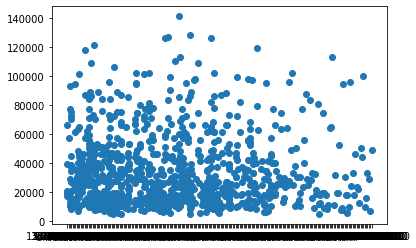

In [21]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [22]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

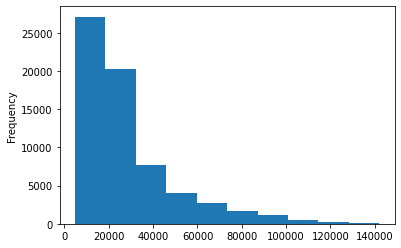

In [23]:
df.SalePrice.plot.hist()

###Parsing dates

When we work with time series data ,we want to enrich the time and date component as much as possible ,

We can do that by telling pandas which all of our columns has  dates in it using  'parse date' parameter.


In [24]:
# Import data again but this  time  parse date
df = pd.read_csv("/TrainAndValid.csv", low_memory= False,parse_dates=["saledate"])

In [25]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

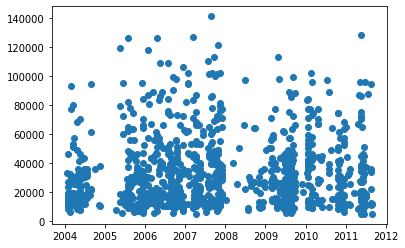

In [26]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [27]:
df.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [28]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [29]:
##Sort DataFrame  by saledate

#When  working with Timeseries  data,its prefferable to sort the data

In [30]:
#Sort in date order

df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

28603   1989-01-31
32138   1989-01-31
52508   1989-01-31
62755   1989-01-31
63166   1989-01-31
54653   1989-01-31
54181   1989-01-31
55454   1989-01-31
55455   1989-01-31
62665   1989-01-31
28927   1989-01-31
28820   1989-01-31
31494   1989-01-31
63155   1989-01-31
63167   1989-01-31
32317   1989-01-31
53101   1989-01-31
54438   1989-01-31
28757   1989-01-31
63558   1989-02-01
Name: saledate, dtype: datetime64[ns]

In [31]:
##Make  a copy of original dataset

df_tmp=df.copy()

## Feature  engineering
## Add  datetime parameters to 'saledate' column

In [32]:
df.saledate.head(20)

28603   1989-01-31
32138   1989-01-31
52508   1989-01-31
62755   1989-01-31
63166   1989-01-31
54653   1989-01-31
54181   1989-01-31
55454   1989-01-31
55455   1989-01-31
62665   1989-01-31
28927   1989-01-31
28820   1989-01-31
31494   1989-01-31
63155   1989-01-31
63167   1989-01-31
32317   1989-01-31
53101   1989-01-31
54438   1989-01-31
28757   1989-01-31
63558   1989-02-01
Name: saledate, dtype: datetime64[ns]

In [39]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"]=df_tmp.saledate.dt.dayofyear

In [40]:
df_tmp.head().T

,28603,32138,52508,62755,63166
SalesID,1259551,1264985,1297898,1329056,1329619
SalePrice,9500,20000,35000,22000,27500
MachineID,1292226,1204499,1537483,1336053,436674
ModelID,6788,6788,4124,4089,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1977,1984,1978,1984,1987
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [34]:
df_tmp[:1].saledate.dt.day

28603    31
Name: saledate, dtype: int64

In [36]:
df_tmp[:1].saledate

28603   1989-01-31
Name: saledate, dtype: datetime64[ns]